# This is the modified version for the simplified ROS simulation 

# Read p1,p2,...,T1,T2,... for each combinations of M1-M3

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [115]:
def get_full_path(folder_path, filename):
    return os.path.join(folder_path, filename)

def clean_file(output_file):
    with open(output_file, "w") as output_file:
        pass


In [116]:
#Previously in C code
def get_line(line):
    return line

def get_val(sum_val, count):
    return sum_val / count if count != 0 else -1

def print_val(val, label):
    if val > -1:
        print(f"{label}: {val}")
    else:
        print(f"{label}: No recorded data.")

def print_val_to_file(output_file, val):
    if val > -1:
        output_file.write(f"{val:.2f},")
    else:
        output_file.write(f"NoData,")

def print_enter_to_file(output_file):
    output_file.write("\n")

def print_val_to_filename(output_file, filename):
    output_file.write(f"file:{filename},,")




def get_field(ttype,line,num):
    if(ttype==int):
        return int(float(line[num-1]))
    if ttype==float:
        return float(line[num-1])

def get_data(filename,outputFile):
    # Running totals and counts
    p1_count = p1_sum = T1_count = T1_sum = T1F_count = T1F_sum = 0
    p2_sum = p3_sum = grab_attempts = T2_count = T2_sum = TR_count = TR_sum = T2F_count = T2F_sum = 0
    p4_count = p4_sum = T3_count = T3_sum = 0
    
    m = filename.split("outcome")[1].replace(".csv","").split("_")
    m1=float(m[1]); m2=float(m[2]);  m3=float(m[3])
    
    
    with open(filename, 'r') as stream:
        stream.readline()  # Discard first line that contains field names
        for line in stream:
            
            line = line.strip().split(',')
            
            p1_check = get_field(int,line,5)
            p1_count += 1
            
            if p1_check == 1:                              # transition to s1
                p1_sum += 1
                T1_count += 1
                T1_sum += get_field(float,line,6)
                
                with_box_detection_column = 1 #add 1 column as saved in excel files
                
                p2_check = get_field(int,line,8+with_box_detection_column)
                if p2_check == 1:                             # transition to s2
                    p2_sum += 1
                    grab_attempts += 1
                    T2_count += 1
                    T2_sum += get_field(float,line,9+with_box_detection_column)
                    p4_count += 1
                    if get_field(int,line,311) == 1:#before 50               # transition to s4
                        p4_sum += 1
                    T3_count += 1
                    T3_sum += get_field(float,line,312)#before 51
                elif get_field(int,line,9+with_box_detection_column) > -1:  # transition to s7
                    grab_attempts += 1
                    T2_count += 1
                    T2_sum += get_field(float,line,9+with_box_detection_column)
                        
                for i in range(11, 110): #this changed, before range(10, 29)   # transition to s3
                    if get_field(int,line,i) > -1:
                        p3_sum += 1
                        grab_attempts += 1
                        T2F_count += 1
                        T2F_sum += get_field(float,line,i)
                    else:
                        break
                for i in range(111,310):
                    if i%2==1: #now only even columns contain info, before range(30, 49):  # transition to s6
                        if get_field(int,line,i) > -1:
                            TR_count += 1
                            TR_sum += get_field(float,line,i)
                        else:
                            break
            else:
                T1F_count += 1
                T1F_sum += get_field(float,line,7)

    # Calculate values
    p1 = get_val(p1_sum, p1_count)
    T1 = get_val(T1_sum, T1_count)
    T1F = get_val(T1F_sum, T1F_count)
    p2 = get_val(p2_sum, grab_attempts)
    p3 = get_val(p3_sum, grab_attempts)
    T2 = get_val(T2_sum, T2_count)
    TR = get_val(TR_sum, TR_count)
    T2F = get_val(T2F_sum, T2F_count)
    p4 = get_val(p4_sum, p4_count)
    T3 = get_val(T3_sum, T3_count)

    # Print to terminal
    #print(f"Fileeeee: {filename}")
    expected_path = "Data/Lookup tables/Raw data/csv_files/outcome_0.5_0.25_0.5.csv"
    if filename == expected_path:
        print("Paths match!")
        print_val(p1, "p1")
        print_val(T1, "T1")
        print_val(T1F, "T1F")
        print_val(p2, "p2")
        print_val(p3, "p3")
        print_val(T2, "T2")
        print_val(TR, "TR")
        print_val(T2F, "T2F")
        print_val(p4, "p4")
        print_val(T3, "T3")
        
    #for testing only
    #if (m1 == 0.50 and m2== 0.30 and m3 == 0.5):
    # if (m1 == 0.80 and m2== 0.35 and m3 == 0.5):
    #     print(m1,m2,m3)
    #     print(T2_count)
    #     print(T2_sum)
    
    # Write to output file
    with open(outputFile, "a") as output_file:
        #print_val_to_filename(output_file, filename)
        print_val_to_file(output_file, m1)
        print_val_to_file(output_file, m2)
        print_val_to_file(output_file, m3)
        print_val_to_file(output_file, p1)
        print_val_to_file(output_file, T1)
        print_val_to_file(output_file, T1F)
        print_val_to_file(output_file, p2)
        print_val_to_file(output_file, p3)
        print_val_to_file(output_file, T2)
        print_val_to_file(output_file, TR)
        print_val_to_file(output_file, T2F)
        print_val_to_file(output_file, p4)
        print_val_to_file(output_file, T3)
        print_enter_to_file(output_file)
        
def readRawData(folder_path,outputFile,start="smoothoutcome"):
    clean_file(outputFile)
    with open(outputFile, "a") as output_file:
        col = ",".join(["M1","M2","M3","p1","T1","T1F","p2","p3","T2","TR","T2F","p4","T3","Pretry","violation"])+"\n"
        output_file.write(col)
    for filename in os.listdir(folder_path):
        full_path = get_full_path(folder_path, filename)
        if os.path.isfile(full_path) and (filename.split("_")[0]==start):
            #print(f"File: {filename}")
            get_data(full_path,outputFile)
    print("Saved in ",outputFile)
    

def main():
    csv_folder = "DataSimplified/lookup" # raw data
    
    #Read raw data and obtain p1,p2,p3...,T1,T2,... from M1-M3 from saved simulations
    startwith="outcome"
    readRawData(csv_folder,"output_julie.csv",startwith)

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'DataSimplified/lookup'

# Visualise data vs env 

In [97]:
#Select data
df = pd.read_csv("output_gris.csv")
df = pd.read_csv('output_julie.csv')
#df = pd.read_csv('sortedLMH.csv')

In [98]:
def plot_cols(df,col1,col2):
    # Filter out rows where either column A or B has 'NoData'
    df_filtered = df[(df[col1] != 'NoData') & (df[col2] != 'NoData')]
    
    plt.plot(df_filtered[col1],df_filtered[col2],'.')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show
    

In [101]:
df[df['P1']==0.7]

,M1,M2,M3,P1,T1,T1F,P2,P3,T2,TR,T2F,P4,T3


In [109]:
dd = df[['M1','P1']].sort_values(by=['P1']).copy()

In [110]:
dd.head()

,M1,P1
172,0.5,0.0
47,0.5,0.0
151,0.7,0.0
135,0.7,0.0
39,0.7,0.0


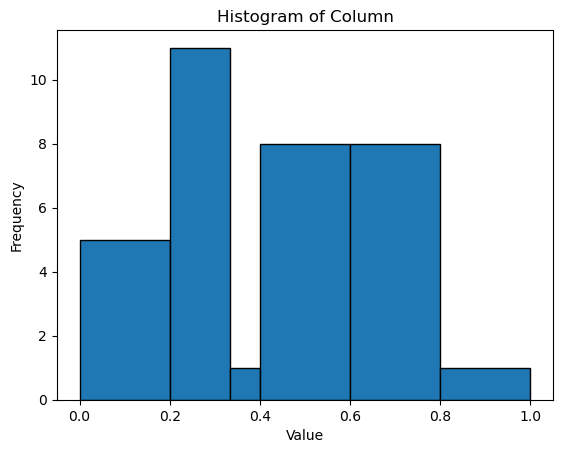

In [113]:
dv1 = dd[dd['M1']==0.5].copy()

# Get unique values from the column
unique_values = sorted(dv1['P1'].unique())

# Plotting histogram
plt.hist(dv1['P1'], bins=unique_values, edgecolor='black')  # Adjust number of bins as per your requirement
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

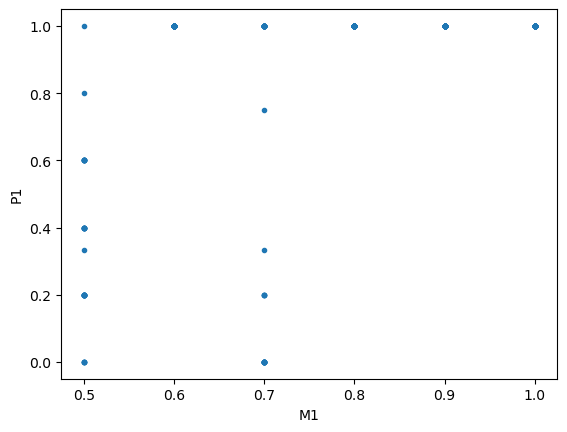

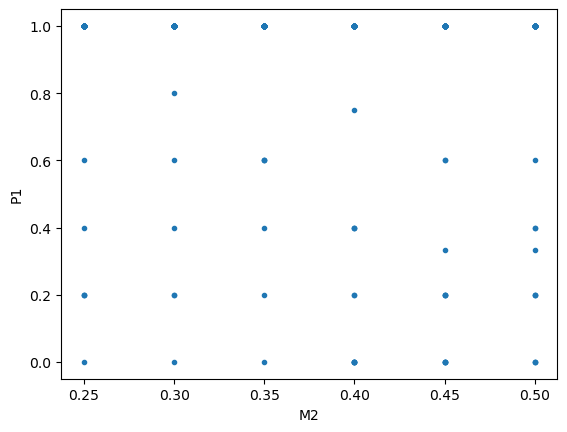

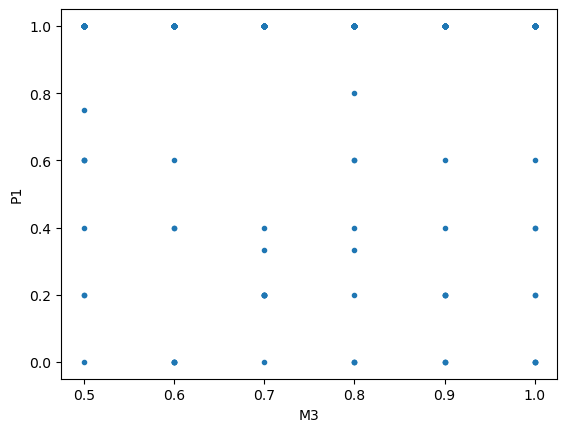

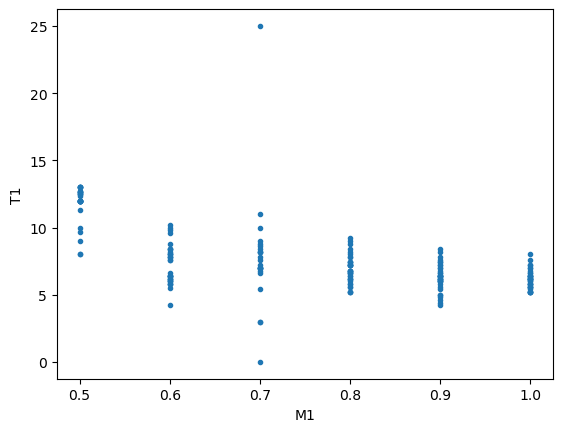

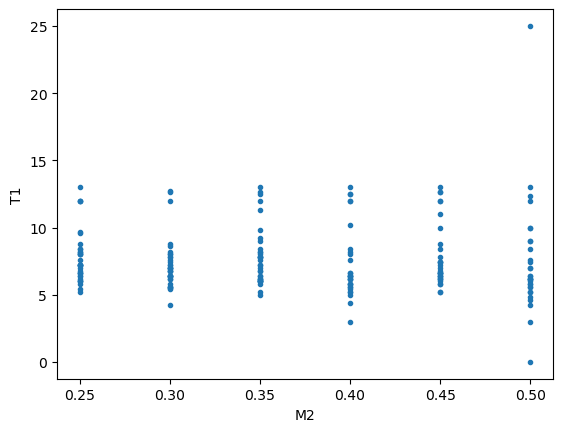

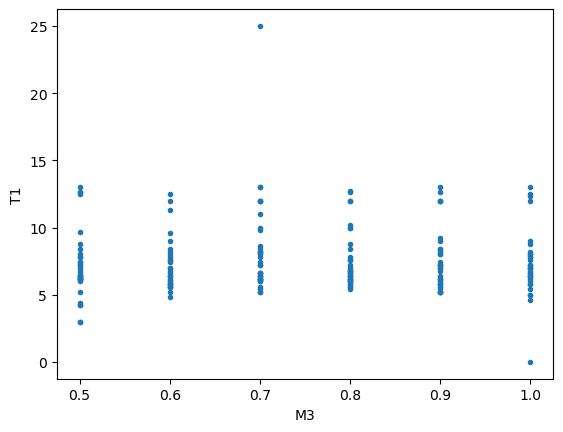

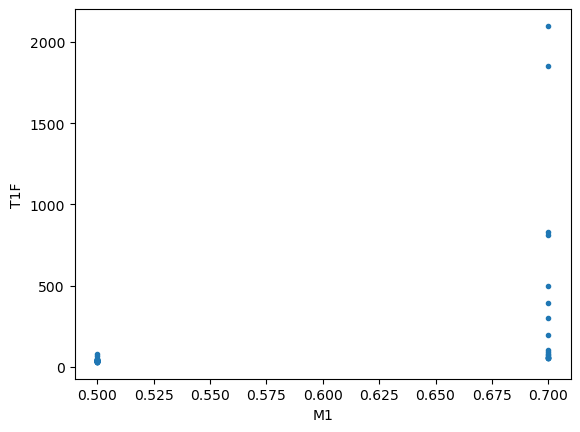

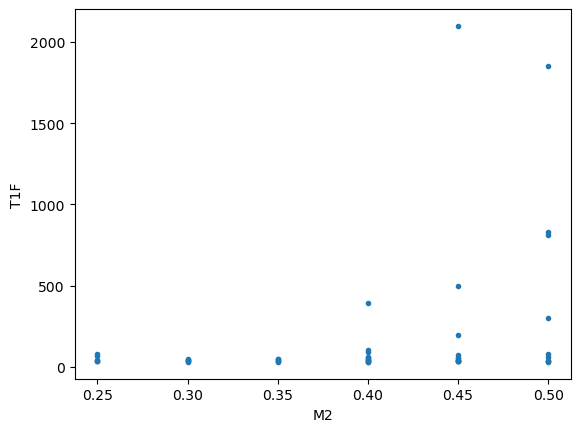

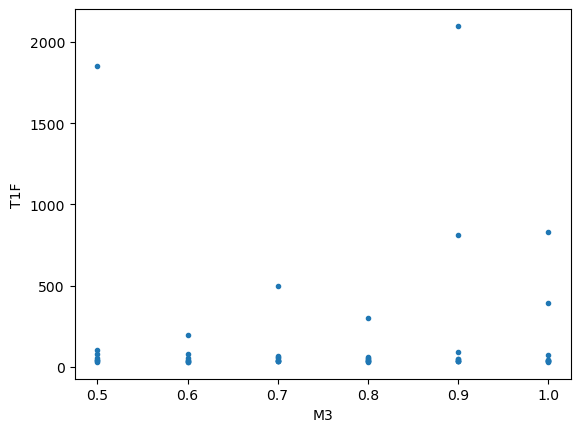

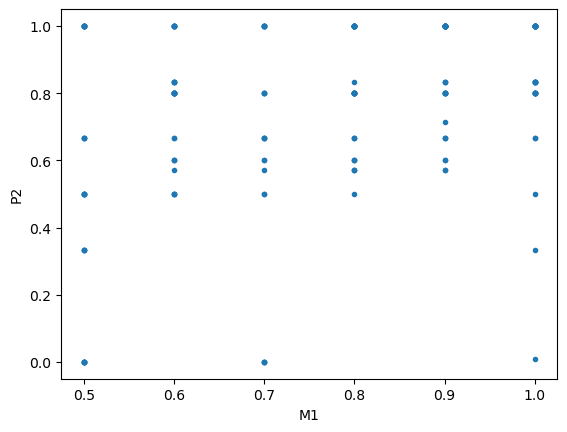

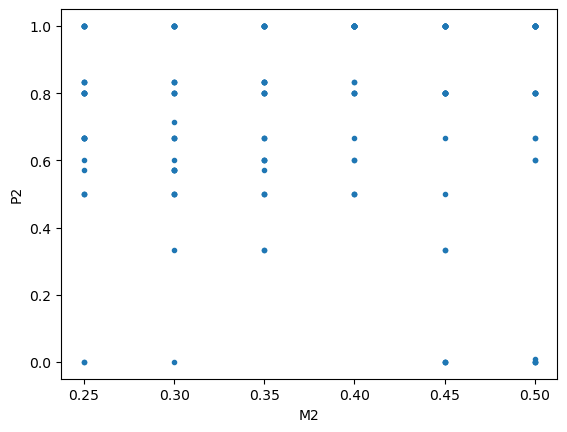

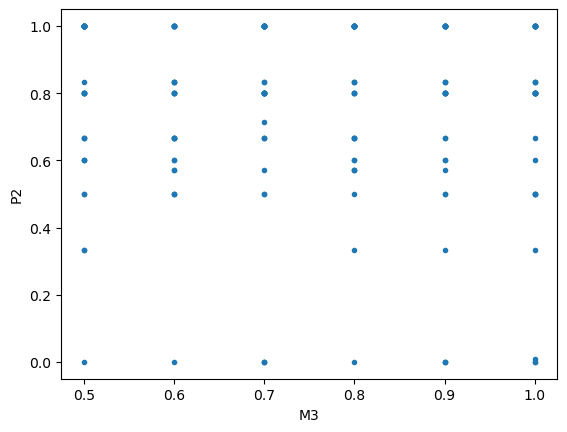

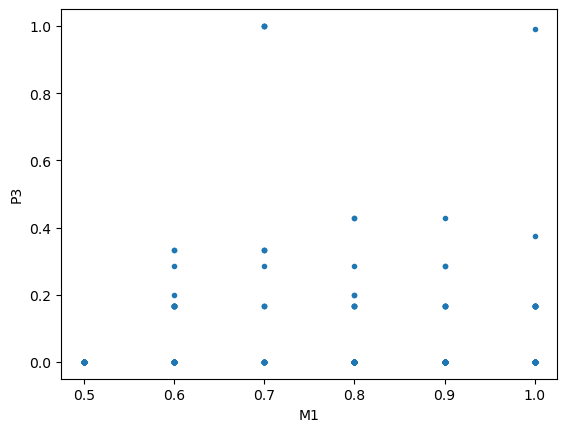

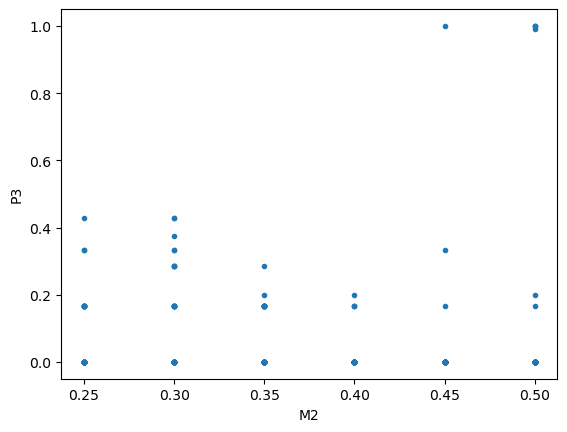

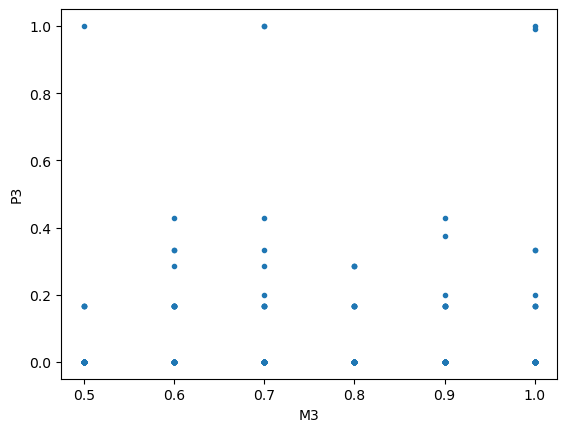

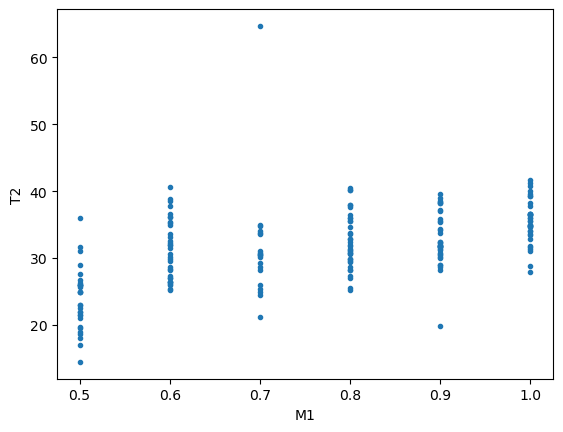

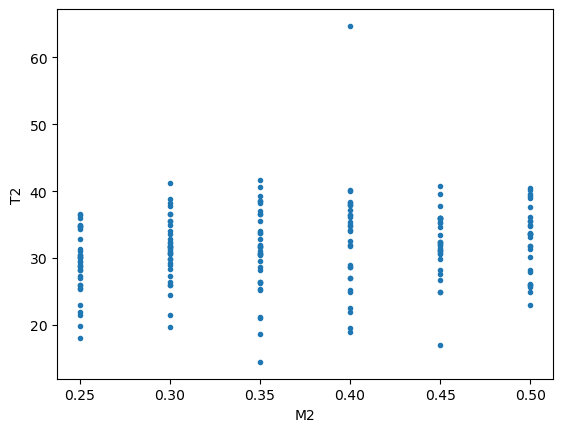

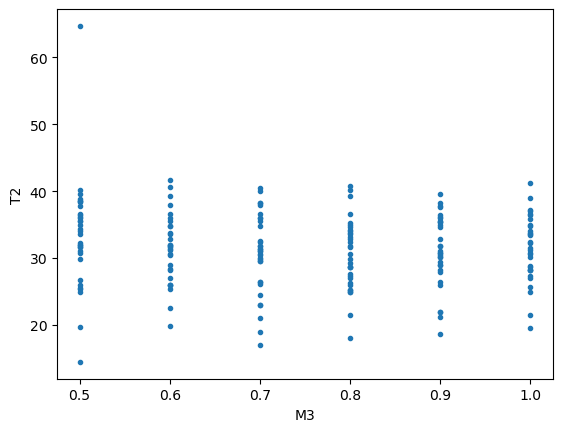

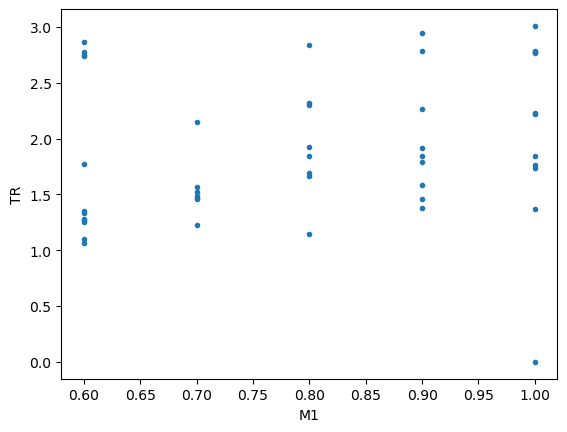

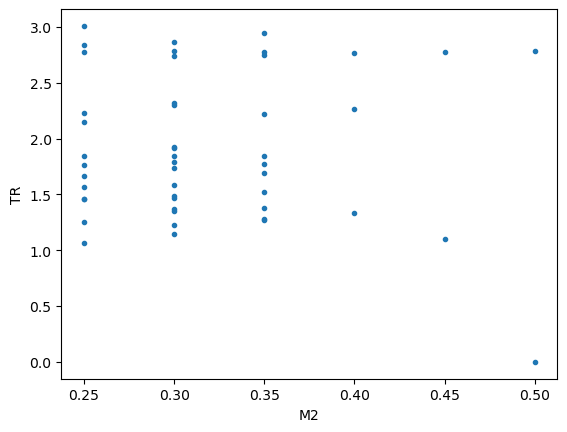

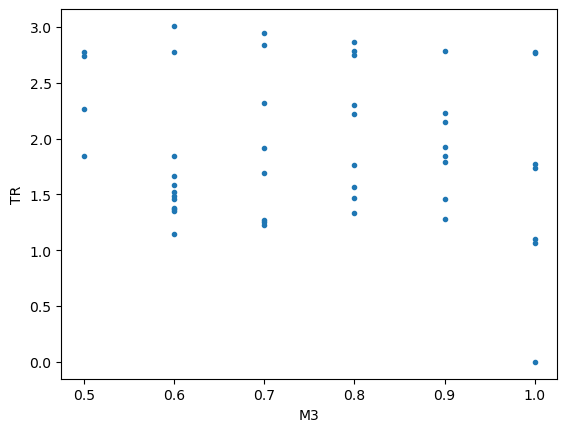

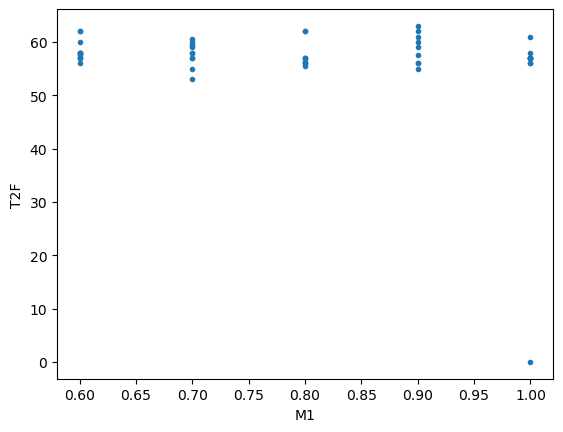

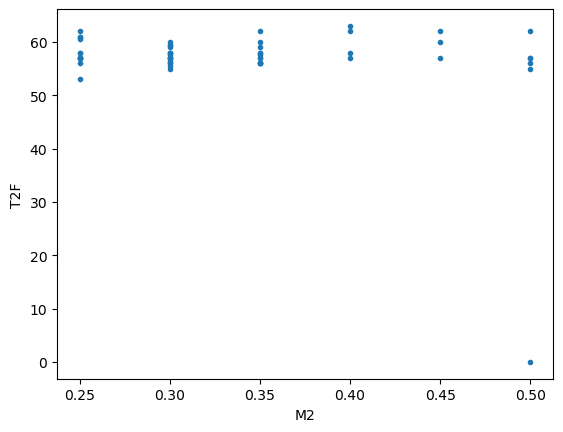

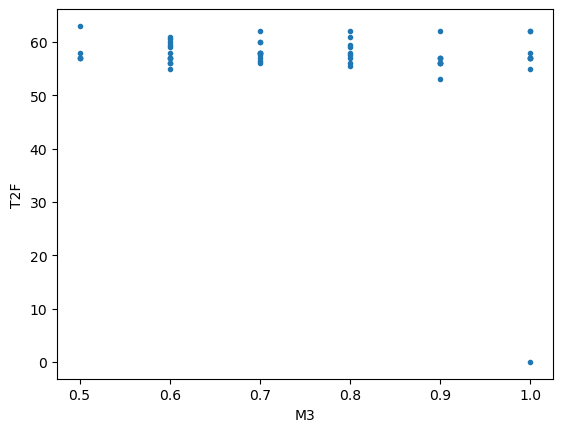

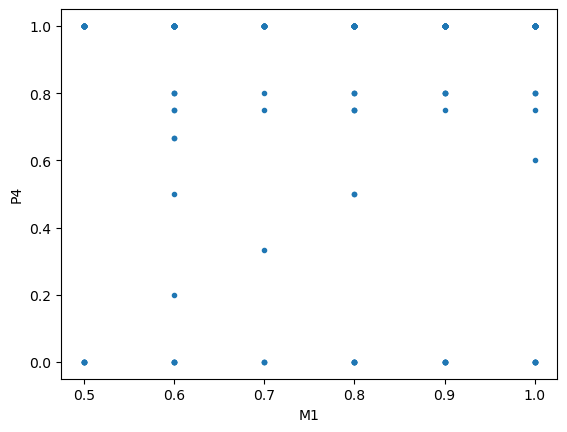

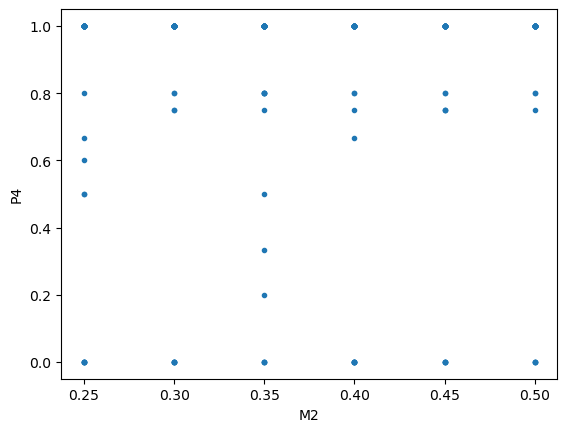

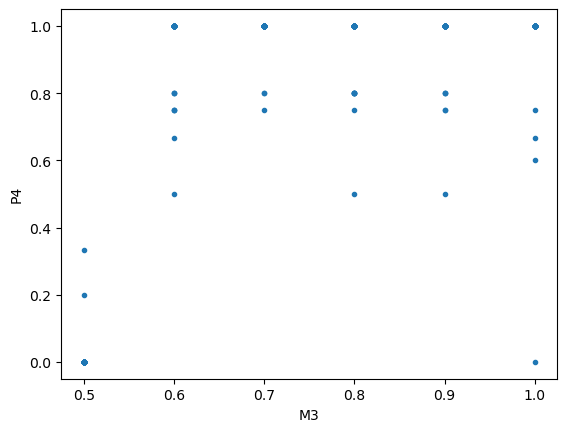

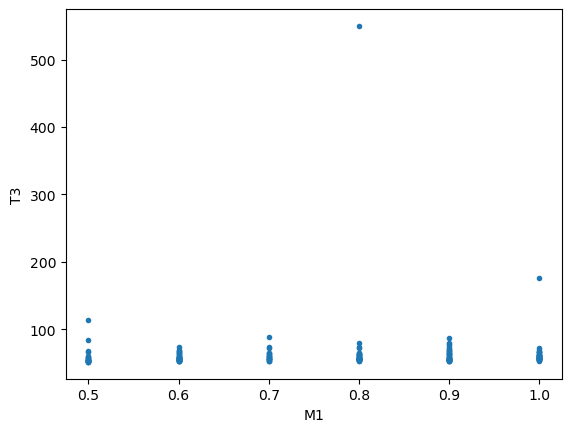

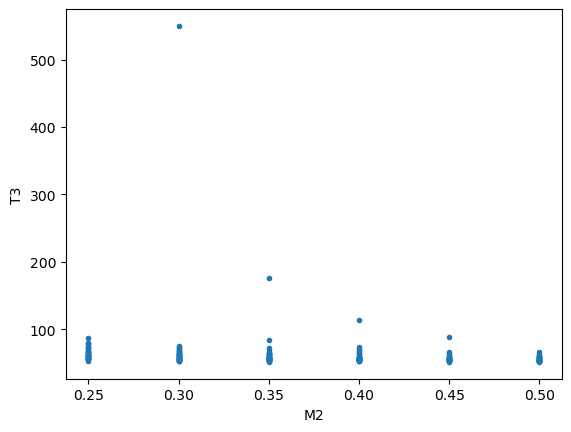

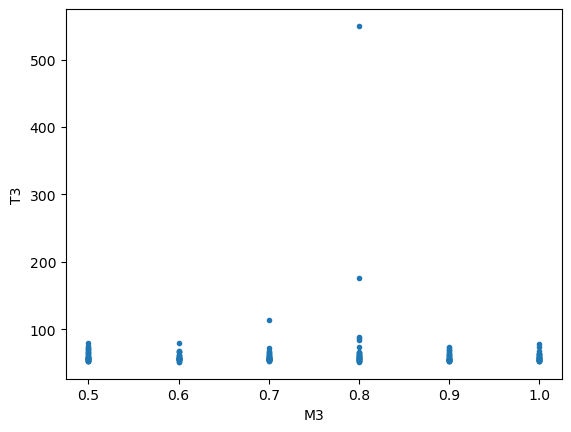

In [99]:
for c2 in range (3,len(df.columns)):
    for c1 in range (0, 3):
        col1 = df.columns[c1];
        col2 = df.columns[c2];
        
        plot_cols(df,col1,col2)
        plt.show()

In [75]:
def compare_data():
    '''Results from Julie's C code results in different TR to mine. Every other variable matches.'''
    
    df = pd.read_csv("output_gris.csv")
    r = df[(df['M1']==1) & (df['M2']==0.3) & (df['M3']==0.9)] 
    print('Julie: ',r)
    print("TR: ",r['TR'].values)

    df = pd.read_csv('output_julie.csv')
    r = df[(df['M1']==1) & (df['M2']==0.3) & (df['M3']==0.9)]
    print('Other:',r)
    print("TR: ",r['TR'].values)

compare_data()

Julie:      M1   M2   M3    p1    T1     T1F    p2    p3     T2     TR    T2F    p4  \
2  1.0  0.3  0.9  1.00  6.40  NoData  0.50  0.38  37.80  17.33  57.00  1.00   

      T3  Pretry  violation  
2  71.50     NaN        NaN  
TR:  ['17.33']
Other:      M1   M2   M3   P1   T1  T1F   P2     P3         T2        TR   T2F   P4  \
94  1.0  0.3  0.9  1.0  6.4  NaN  0.5  0.375  37.799999  1.844246  57.0  1.0   

      T3  
94  71.5  
TR:  [1.844246]


### Fit data: Multivariable regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

Example from: https://www.w3schools.com/python/python_ml_multiple_regression.asp


In [78]:
import pandas
from sklearn import linear_model 
import matplotlib.pyplot as plt

In [79]:
df.head()

,M1,M2,M3,P1,T1,T1F,P2,P3,T2,TR,T2F,P4,T3
0,1.0,0.50,0.5,1.0,6.2,NaN,0.8,0.0,35.599998,NaN,NaN,0.0,52.250000
1,0.8,0.50,0.5,1.0,6.2,NaN,1.0,0.0,35.599998,NaN,NaN,0.0,57.000000
2,0.5,0.30,0.9,0.2,8.0,49.0,1.0,0.0,29.000000,NaN,NaN,1.0,60.000000
3,0.9,0.50,0.7,1.0,7.4,NaN,0.8,0.0,31.400000,NaN,NaN,1.0,53.500000
4,0.8,0.45,0.6,1.0,7.4,NaN,1.0,0.0,30.600000,NaN,NaN,0.8,55.400002


In [83]:
# Add columns multi-variable (M combinations)
df['M1M2'] = df['M1']*df['M2']
df['M1M3'] = df['M1']*df['M3']
df['M2M3'] = df['M3']*df['M2']
df['M1M2M3'] = df['M1']*df['M2']*df['M3']
df.head()

,M1,M2,M3,P1,T1,T1F,P2,P3,T2,TR,T2F,P4,T3,M1M2,M1M3,M2M3,M1M2M3
0,1.0,0.50,0.5,1.0,6.2,NaN,0.8,0.0,35.599998,NaN,NaN,0.0,52.250000,0.50,0.50,0.25,0.250
1,0.8,0.50,0.5,1.0,6.2,NaN,1.0,0.0,35.599998,NaN,NaN,0.0,57.000000,0.40,0.40,0.25,0.200
2,0.5,0.30,0.9,0.2,8.0,49.0,1.0,0.0,29.000000,NaN,NaN,1.0,60.000000,0.15,0.45,0.27,0.135
3,0.9,0.50,0.7,1.0,7.4,NaN,0.8,0.0,31.400000,NaN,NaN,1.0,53.500000,0.45,0.63,0.35,0.315
4,0.8,0.45,0.6,1.0,7.4,NaN,1.0,0.0,30.600000,NaN,NaN,0.8,55.400002,0.36,0.48,0.27,0.216


In [82]:
df_filtered


,M1,M2,M3,P1,T1,T1F,P2,P3,T2,TR,T2F,P4,T3
0,1.0,0.50,0.5,1.0,6.2,NaN,0.8,0.0,35.599998,NaN,NaN,0.00,52.250000
1,0.8,0.50,0.5,1.0,6.2,NaN,1.0,0.0,35.599998,NaN,NaN,0.00,57.000000
2,0.5,0.30,0.9,0.2,8.0,49.0,1.0,0.0,29.000000,NaN,NaN,1.00,60.000000
3,0.9,0.50,0.7,1.0,7.4,NaN,0.8,0.0,31.400000,NaN,NaN,1.00,53.500000
4,0.8,0.45,0.6,1.0,7.4,NaN,1.0,0.0,30.600000,NaN,NaN,0.80,55.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.9,0.25,0.5,1.0,7.2,NaN,1.0,0.0,34.400002,NaN,NaN,0.00,72.599998
212,0.6,0.35,0.5,1.0,6.2,NaN,1.0,0.0,38.599998,NaN,NaN,0.20,58.400002
213,0.6,0.40,0.7,1.0,6.4,NaN,0.8,0.2,32.500000,NaN,58.0,0.75,58.000000
214,0.8,0.45,0.7,1.0,6.6,NaN,0.8,0.0,36.000000,NaN,NaN,1.00,55.250000


In [84]:
col = 'P1'
# Filter out rows where has 'NoData'
df_filtered = df[df[col].notna()].copy() 
# Regression variables
X = df_filtered[['M1', 'M2','M3','M1M2','M1M3','M2M3','M1M2M3']] # independent var
y = df_filtered[col]                           # dependable var
# Regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_) 
print(regr.intercept_)


LinearRegression()

[-0.17011363 -2.59893132 -1.21446016  2.26174805  1.36548918  1.98411055
 -2.26417571]
1.343088840402374


In [90]:
cols = ['M1', 'M2','M3','M1M2','M1M3','M2M3','M1M2M3']
for n,c in zip(range(len(cols)), cols):
    print(regr.coef_[n],'*',c)


-0.17011362765032453 * M1
-2.598931315520697 * M2
-1.2144601559460697 * M3
2.2617480536656007 * M1M2
1.3654891801993123 * M1M3
1.9841105475349001 * M2M3
-2.2641757144933026 * M1M2M3


In [47]:
df['Funct'] = regr.intercept_ + regr.coef_[0] * df['M1'] + \
    regr.coef_[1] * df['M2'] + \
    regr.coef_[2] * df['M3'] + \
    regr.coef_[3] * df['M1M2'] + \
    regr.coef_[4] * df['M1M3'] + \
    regr.coef_[5] * df['M2M3'] + \
    regr.coef_[6] * df['M1M2M3'] 


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
hist_file = "Data/Day data/degrading_grip_day_2.csv" # one day run